In [1]:
import json5
import pandas
from matplotlib import pyplot as plt
import seaborn as sns

from mlos_bench.storage import from_config

### Connect using existing mlos_bench configs

In [3]:
storage = from_config(config_file="storage/sqlite.jsonc")

### Load a sqlite Experiment

In [9]:
experiment_globals = "config/experiments/sqlite-sync-journal-pagesize-caching-experiment.jsonc"

with open(experiment_globals, mode='r') as f:
    experiment_id = json5.load(f)['experiment_id']
experiment_id

'sqlite-sync-journal-pagesize-caching-experiment'

## Get all data for one experiment

In [10]:
exp = storage.experiments[experiment_id]
exp

Experiment :: sqlite-sync-journal-pagesize-caching-experiment

In [11]:
df = exp.results
df.head()

,trial_id,ts_start,ts_end,config_id,status,config.cache_size,config.journal_mode,config.journal_size_limit,config.mmap_size,config.page_size,...,result.Socket messages received,result.Socket messages sent,result.Swaps,result.System time (seconds),result.Throughput (requests/second),result.User time (seconds),result.Voluntary context switches,result.isolation,result.scalefactor,result.terminals
0,0,2023-10-10 21:24:47.492927,2023-10-10 21:25:49.387720,710,SUCCEEDED,1,delete,-1,-1,4096,...,0,0,0,3.61,24.916242,5.40,117445,TRANSACTION_SERIALIZABLE,1,1
1,1,2023-10-10 21:25:49.431382,2023-10-10 21:26:51.449788,711,SUCCEEDED,1656398469,truncate,1633227268,363162755,2048,...,0,0,0,3.90,136.398333,10.37,116366,TRANSACTION_SERIALIZABLE,1,1
2,2,2023-10-10 21:26:51.496642,2023-10-10 21:27:53.904873,712,SUCCEEDED,1281136238,off,704594,779126884,2048,...,0,0,0,2.21,143.849273,11.09,101870,TRANSACTION_SERIALIZABLE,1,1
3,3,2023-10-10 21:27:53.953987,2023-10-10 21:28:56.350663,713,SUCCEEDED,948829517,wal,1120228729,1951308613,8192,...,0,0,0,1.66,138.747777,11.44,93873,TRANSACTION_SERIALIZABLE,1,1
4,4,2023-10-10 21:28:56.401313,2023-10-10 21:29:59.232525,714,SUCCEEDED,699030920,persist,2027784438,2120909557,8192,...,0,0,0,12.76,2049.177860,56.30,76037,TRANSACTION_SERIALIZABLE,1,1


In [28]:
df.loc[1]

trial_id                                                                                              1
ts_start                                                                     2023-10-10 21:25:49.431382
ts_end                                                                       2023-10-10 21:26:51.449788
config_id                                                                                           711
status                                                                                        SUCCEEDED
config.cache_size                                                                            1656398469
config.journal_mode                                                                            truncate
config.journal_size_limit                                                                    1633227268
config.mmap_size                                                                              363162755
config.page_size                                                

### Plot the results

In [29]:
METRIC = "result.File system outputs"
SCORE = "result.90th Percentile Latency (microseconds)"
CATEGORY = "config.synchronous"

/home/vscode/.conda/envs/mlos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.conda/envs/mlos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.conda/envs/mlos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/vscode/.conda/envs/mlos/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

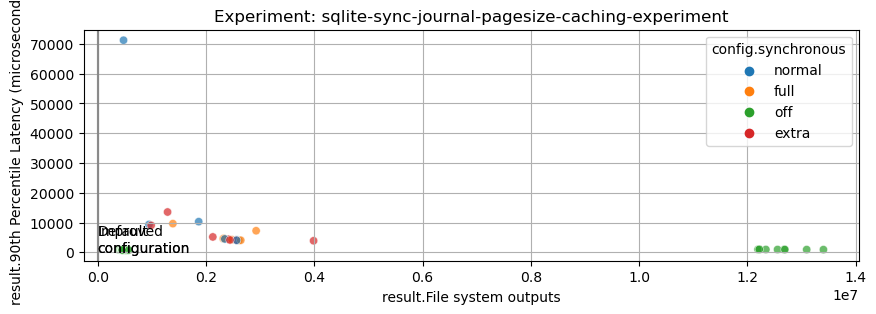

In [30]:
plt.rcParams["figure.figsize"] = (10, 3)

sns.scatterplot(data=df, x=METRIC, y=SCORE, hue=CATEGORY, marker='o', alpha=0.7)

plt.axvline(x=8, color="#888888", alpha=0.8)
plt.text(8.5, 143, "Improved\nconfiguration", horizontalalignment='left', size='medium', color='black')

plt.axvline(x=20, color="#888888", alpha=0.8)
plt.text(20.5, 143, "Default\nconfiguration", horizontalalignment='left', size='medium', color='black')

plt.title("Experiment: " + exp.exp_id)
plt.grid()
plt.show()

In [ ]:
## TODO